## Libraries & etc

In [ ]:
# 한국어 설정
# 런타임 재시작 필요
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
# libraries
import requests
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.validators.scatter.marker import SymbolValidator

plt.rc('font', family='NanumBarunGothic')

%matplotlib inline

## Function

In [2]:
def review_text_crawler(product_code: str, page_num: int):
    final_review_list = []
    for num in tqdm(range(1, page_num+1)):
        url = 'https://review9.cre.ma/easydew.co.kr/products/reviews?product_code={}&app=0&iframe=1&iframe_id=crema-product-reviews-2&page={}'.format(product_code, str(num))
        response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36'})
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            reviews = soup.select('div.review_list_v2__review_lcontent')
            reviewer_names = soup.select('div.review_list_v2__review_rcontent')
        else :
            print('status code --> ', response.status_code)

        review_list = []
        for name, review in zip(reviewer_names, reviews):
            reviewer = name.select_one('div.review_list_v2__user_name_message').text.split('님')[0].strip()
            review_text = review.select_one('div.review_list_v2__message.js-translate-text').text.strip()
            # print(reviewer)
            # print(review_text)
            # print()
            reviewer_review_list = [reviewer, review_text]
            review_list.append(reviewer_review_list)

        final_review_list += review_list

    review_df = pd.DataFrame(final_review_list, columns=['reviewer', 'review_text'])
    # review_df = review_df.iloc[:, :-1]
    return review_df

## Crawling

In [ ]:
# -- 미백/기미 --
# EGF 기미엠플: 2073 (one of the products with a number of reviews)
# 기미크림: 2226 (one of the products with a number of reviews)
# 이지듀 EX DW-EGF 멜라토닝 패치 8매 (기미앰플 1ml 증정): 2079 (one of the products with a number of reviews)
# [~66%] 기미 토닝 2700샷: 2221

# -- 트러블/민감/진정 --
# [NEW 손상완화크림] 베리어 리페어 크림: 2227
# [런칭특가 50%] EGF 흔적세럼: 2303
# [런칭특가 50%] 아크네 클리어 SOS 스팟: 2288
# [런칭특가 ~62% ] EGF 필링세럼 + 해면: 2314 --> 페이지 20개

# -- 모공/탄력/주름 --
# DW-EGF 크림 프레좀 50ml: 1646
# 이지듀 DW-EGF 더마 톡스 니들샷: 2185

In [3]:
# 미백/기미
review_text_df_0 = review_text_crawler('2073', 100)
review_text_df_1 = review_text_crawler('2226', 100)
review_text_df_2 = review_text_crawler('2079', 100)
review_text_df_3 = review_text_crawler('2221', 100)

# 트러블/민감/진정
review_text_df_4 = review_text_crawler('2227', 100)
review_text_df_5 = review_text_crawler('2303', 100)
review_text_df_6 = review_text_crawler('2288', 100)
review_text_df_7 = review_text_crawler('2314', 20)

# 모공/탄력/주름
review_text_df_8 = review_text_crawler('1646', 100)
review_text_df_9 = review_text_crawler('2185', 100)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [9]:
review_text_df_0['preprocessed_text'] = review_text_df_0['review_text'].replace('[^가-힣]', ' ', regex=True)
review_text_df_0

,reviewer,review_text,preprocessed_text
0,박****,"마스크 쓰고 다녀서 다른곳은 기미가 없는데,마스크로 가려지지 않은 부위가 심각하게 ...",마스크 쓰고 다녀서 다른곳은 기미가 없는데 마스크로 가려지지 않은 부위가 심각하게 ...
1,박****,"광고보고 설마히면서 구매했어요효과 굿입니다, 재구매하려 합니다. 또한 너무 좋아서 ...",광고보고 설마히면서 구매했어요효과 굿입니다 재구매하려 합니다 또한 너무 좋아서 ...
2,이****,세번째 구매입니다. 한병 써보니 너무 좋아 1+1에 언능 재구매했더니 해외 있는 ...,세번째 구매입니다 한병 써보니 너무 좋아 에 언능 재구매했더니 해외 있는 ...
3,정****,요즘 기미관련화장품들이 많이 나오는데 매번실망만 하던중 제약회사에서 기미제품을 만든...,요즘 기미관련화장품들이 많이 나오는데 매번실망만 하던중 제약회사에서 기미제품을 만든...
4,백****,기미 개선 제품을 이것저것 많이 써 봤지만 별 효과를 못 느껴서 광고로 접한 이 제...,기미 개선 제품을 이것저것 많이 써 봤지만 별 효과를 못 느껴서 광고로 접한 이 제...
...,...,...,...
495,네이버 페이 구****,잘 받았습니다. 잘 쓸께요.(2023-09-13 16:33:54 에 등록된 네이버 ...,잘 받았습니다 잘 쓸께요 에 등록된 네이버 ...
496,네이버 페이 구****,꾸준히 써볼께요^^(2023-09-13 11:27:39 에 등록된 네이버 페이 구매평),꾸준히 써볼께요 에 등록된 네이버 페이 구매평
497,네이버 페이 구****,사용해보고 후기 드릴게요..(2023-09-13 10:13:51 에 등록된 네이버 ...,사용해보고 후기 드릴게요 에 등록된 네이버 ...
498,네이버 페이 구****,처음 구매했어요 잘 쓰고 담에 리뷰 써야겠어요(2023-09-13 02:07:46 ...,처음 구매했어요 잘 쓰고 담에 리뷰 써야겠어요 ...


## WordCloud

### 미백 제품

> review_text_df_0

In [56]:
# !pip install -q wordcloud
from wordcloud import WordCloud

final_text = ''
for idx in tqdm(range(len(review_text_df_0))):
    final_text+=review_text_df_0.loc[idx, 'preprocessed_text']

  0%|          | 0/500 [00:00<?, ?it/s]

In [52]:
# STOPWORDS.add('네이버')
# STOPWORDS.add('페이')
# STOPWORDS.add('등록된')
# STOPWORDS.add('에')
# STOPWORDS.add('구매평')
STOPWORDS.add('좋아요')

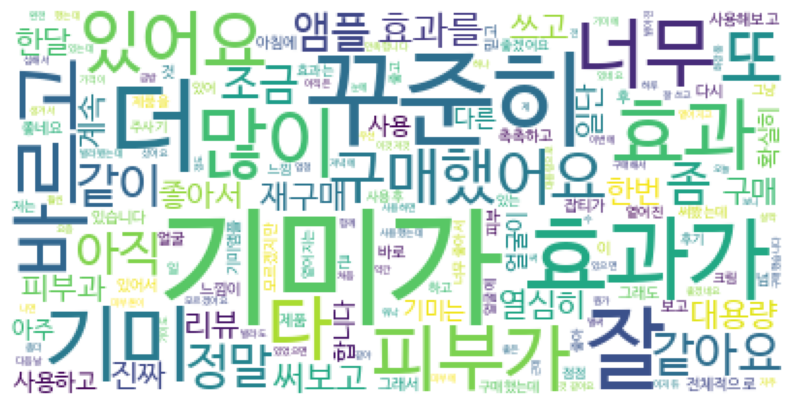

In [57]:
from wordcloud import STOPWORDS
wordcloud = WordCloud(font_path='NanumBarunGothic', background_color='white').generate(final_text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

> review_text_df_1

In [58]:
# !pip install -q wordcloud
from wordcloud import WordCloud

# preprocessing
review_text_df_1['preprocessed_text'] = review_text_df_1['review_text'].replace('[^가-힣]', ' ', regex=True)
review_text_df_1

final_text = ''
for idx in tqdm(range(len(review_text_df_1))):
    final_text+=review_text_df_1.loc[idx, 'preprocessed_text']

  0%|          | 0/421 [00:00<?, ?it/s]

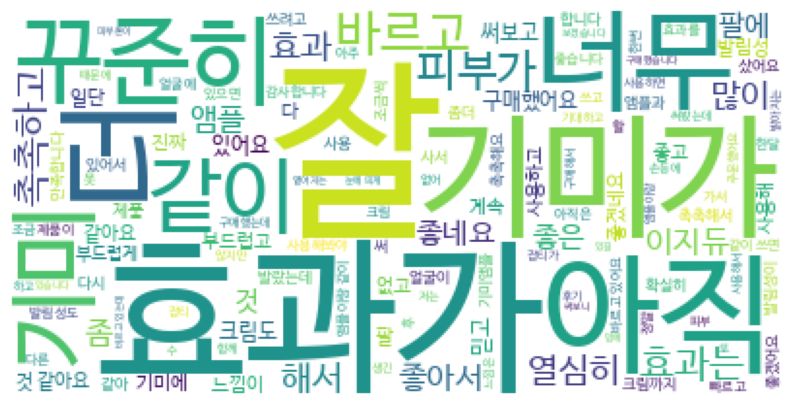

In [59]:
from wordcloud import STOPWORDS
wordcloud = WordCloud(font_path='NanumBarunGothic', background_color='white').generate(final_text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

> review_text_df_2

  0%|          | 0/500 [00:00<?, ?it/s]

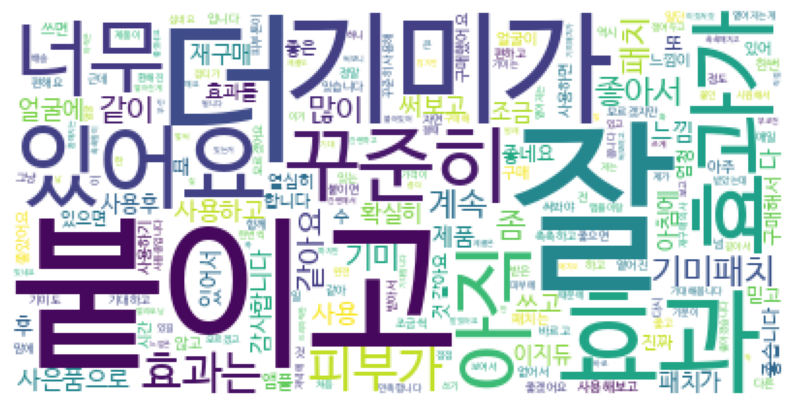

In [60]:
# !pip install -q wordcloud
from wordcloud import WordCloud

# preprocessing
review_text_df_2['preprocessed_text'] = review_text_df_2['review_text'].replace('[^가-힣]', ' ', regex=True)
review_text_df_2

final_text = ''
for idx in tqdm(range(len(review_text_df_2))):
    final_text+=review_text_df_2.loc[idx, 'preprocessed_text']

from wordcloud import STOPWORDS
wordcloud = WordCloud(font_path='NanumBarunGothic', background_color='white').generate(final_text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

> review_text_df_3

  0%|          | 0/500 [00:00<?, ?it/s]

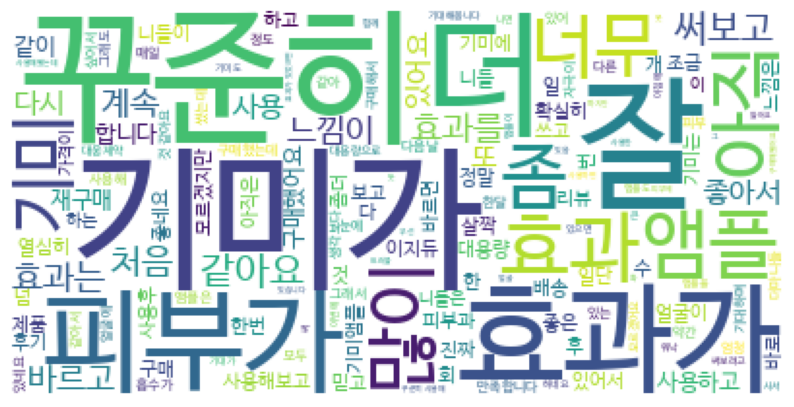

In [61]:
# !pip install -q wordcloud
from wordcloud import WordCloud

# preprocessing
review_text_df_3['preprocessed_text'] = review_text_df_3['review_text'].replace('[^가-힣]', ' ', regex=True)
review_text_df_3

final_text = ''
for idx in tqdm(range(len(review_text_df_3))):
    final_text+=review_text_df_3.loc[idx, 'preprocessed_text']

from wordcloud import STOPWORDS
wordcloud = WordCloud(font_path='NanumBarunGothic', background_color='white').generate(final_text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 트러블 제품

In [76]:
# STOPWORDS.add('스마트스토어')
# STOPWORDS.add('좋네요')
# STOPWORDS.add('좋아서')
# STOPWORDS.add('스마트스토어에서')
STOPWORDS.add('잘')
STOPWORDS.add('구매후기')

  0%|          | 0/500 [00:00<?, ?it/s]

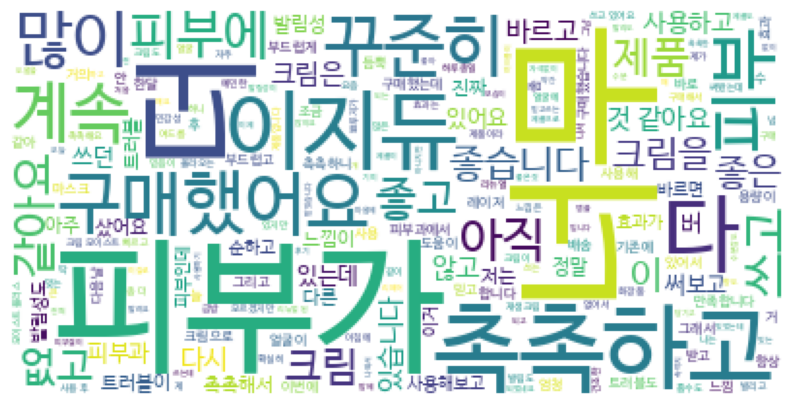

In [77]:
# !pip install -q wordcloud
from wordcloud import WordCloud

# preprocessing
review_text_df_4['preprocessed_text'] = review_text_df_4['review_text'].replace('[^가-힣]', ' ', regex=True)
review_text_df_4

final_text = ''
for idx in tqdm(range(len(review_text_df_4))):
    final_text+=review_text_df_4.loc[idx, 'preprocessed_text']

from wordcloud import STOPWORDS
wordcloud = WordCloud(font_path='NanumBarunGothic', background_color='white').generate(final_text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

  0%|          | 0/500 [00:00<?, ?it/s]

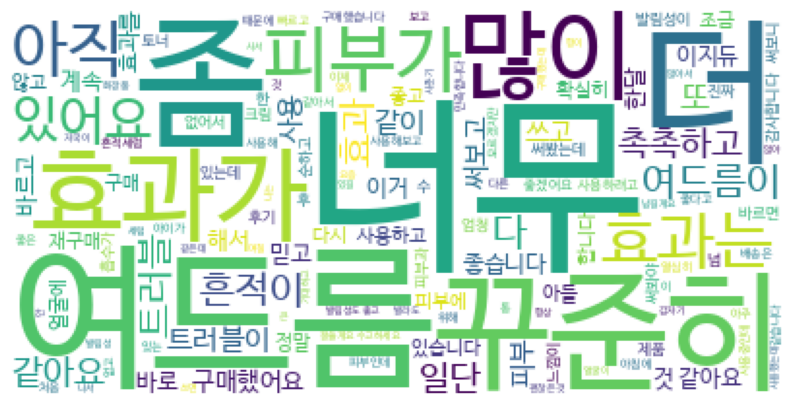

In [78]:
# !pip install -q wordcloud
from wordcloud import WordCloud

# preprocessing
review_text_df_5['preprocessed_text'] = review_text_df_5['review_text'].replace('[^가-힣]', ' ', regex=True)
review_text_df_5

final_text = ''
for idx in tqdm(range(len(review_text_df_5))):
    final_text+=review_text_df_5.loc[idx, 'preprocessed_text']

from wordcloud import STOPWORDS
wordcloud = WordCloud(font_path='NanumBarunGothic', background_color='white').generate(final_text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

  0%|          | 0/500 [00:00<?, ?it/s]

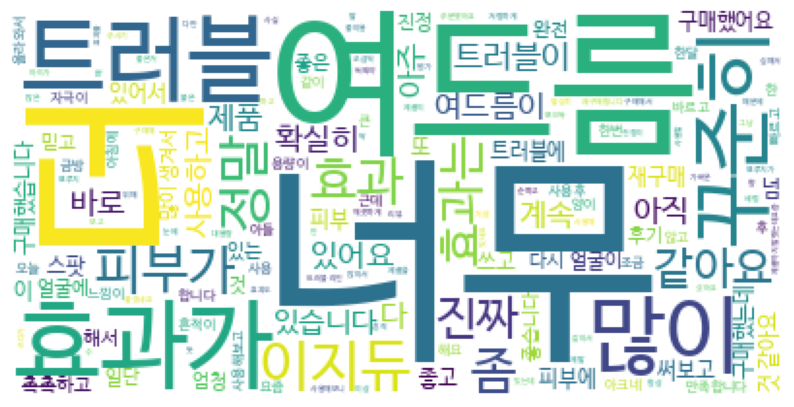

In [79]:
# !pip install -q wordcloud
from wordcloud import WordCloud

# preprocessing
review_text_df_6['preprocessed_text'] = review_text_df_6['review_text'].replace('[^가-힣]', ' ', regex=True)
review_text_df_6

final_text = ''
for idx in tqdm(range(len(review_text_df_6))):
    final_text+=review_text_df_6.loc[idx, 'preprocessed_text']

from wordcloud import STOPWORDS
wordcloud = WordCloud(font_path='NanumBarunGothic', background_color='white').generate(final_text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

  0%|          | 0/95 [00:00<?, ?it/s]

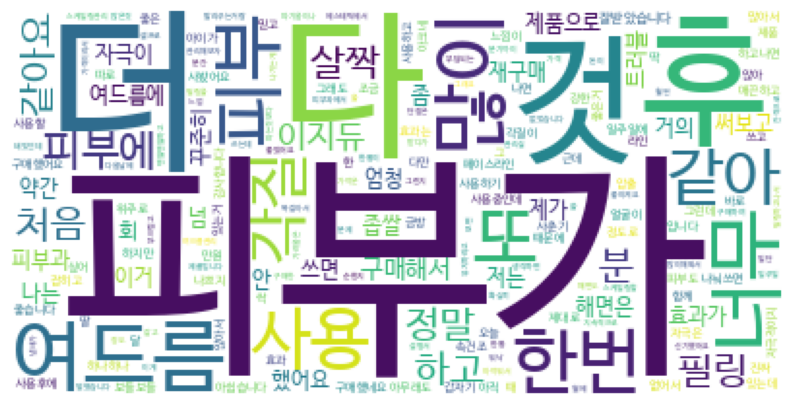

In [80]:
# !pip install -q wordcloud
from wordcloud import WordCloud

# preprocessing
review_text_df_7['preprocessed_text'] = review_text_df_7['review_text'].replace('[^가-힣]', ' ', regex=True)
review_text_df_7

final_text = ''
for idx in tqdm(range(len(review_text_df_7))):
    final_text+=review_text_df_7.loc[idx, 'preprocessed_text']

from wordcloud import STOPWORDS
wordcloud = WordCloud(font_path='NanumBarunGothic', background_color='white').generate(final_text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 모공 제품